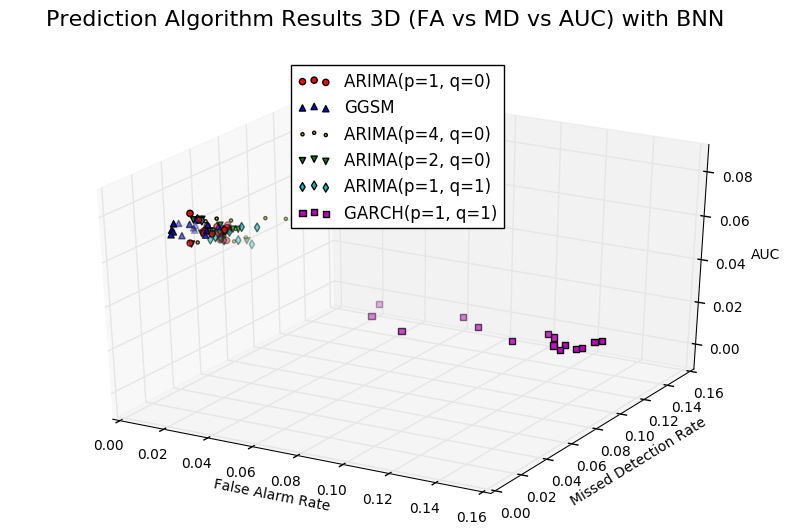

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

r = [
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0786640754651, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.325, FA=0.0205908683975, MD=0.0214861235452',
 'Model=GGSM, ROC AUC=0.0774012384866, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=2.875, FA=0.0205415499533, MD=0.0102707749767',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0761266784015, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.175, FA=0.0286956521739, MD=0.0269565217391',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0761173515935, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.175, FA=0.0228471001757, MD=0.0228471001757',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0757153463185, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.375, FA=0.0214477211796, MD=0.0223413762288',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0756679690282, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.175, FA=0.0236634531113, MD=0.0245398773006',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0754568440117, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.175, FA=0.0228270412643, MD=0.0237050043898',
 'Model=GGSM, ROC AUC=0.0754402093334, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.275, FA=0.0291438979964, MD=0.0200364298725',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0754000349375, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.425, FA=0.0240213523132, MD=0.0240213523132',
 'Model=GGSM, ROC AUC=0.0748476932549, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=2.875, FA=0.0202578268877, MD=0.00920810313076',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0742798497685, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.425, FA=0.0239574090506, MD=0.0266193433895',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0740861360799, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.275, FA=0.0407993338884, MD=0.0416319733555',
 'Model=GGSM, ROC AUC=0.0739844801916, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=2.875, FA=0.0205357142857, MD=0.00982142857143',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0737728770009, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0308483290488, MD=0.0334190231362',
 'Model=GGSM, ROC AUC=0.0736571190477, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=2.875, FA=0.02, MD=0.0217391304348',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0732965208722, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.475, FA=0.0466448445172, MD=0.0466448445172',
 'Model=GGSM, ROC AUC=0.0729748131007, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.275, FA=0.0287253141831, MD=0.0197486535009',
 'Model=GGSM, ROC AUC=0.0728421696218, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=2.875, FA=0.0199637023593, MD=0.00907441016334',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0724650807068, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0284728213978, MD=0.0293356341674',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0723430093559, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.525, FA=0.0246913580247, MD=0.026455026455',
 'Model=GGSM, ROC AUC=0.072335600907, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.575, FA=0.0172257479601, MD=0.0308250226655',
 'Model=GGSM, ROC AUC=0.0721195776141, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.375, FA=0.0132158590308, MD=0.0246696035242',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0719837244563, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0276577355229, MD=0.028522039758',
 'Model=GGSM, ROC AUC=0.071903224335, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.025, FA=0.028085106383, MD=0.0289361702128',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0716959200563, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.225, FA=0.0296108291032, MD=0.0329949238579',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0714591803191, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0310344827586, MD=0.0275862068966',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0713662833785, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.075, FA=0.03066439523, MD=0.03066439523',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0712736156469, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.575, FA=0.02434625789, MD=0.0252479711452',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0711867714533, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.175, FA=0.0346283783784, MD=0.0346283783784',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0711160555358, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.625, FA=0.0310559006211, MD=0.0283939662822',
 'Model=GGSM, ROC AUC=0.0710111455066, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.275, FA=0.0283185840708, MD=0.0194690265487',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0707721862117, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.325, FA=0.0263829787234, MD=0.0255319148936',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0706801698185, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.275, FA=0.0391340549542, MD=0.0383014154871',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0705750929863, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.425, FA=0.0243682310469, MD=0.0243682310469',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0705378934852, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.125, FA=0.0322580645161, MD=0.0322580645161',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.070462680173, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.525, FA=0.0272647317502, MD=0.0263852242744',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0703398721672, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.375, FA=0.0326906957251, MD=0.0335289186924',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0703034380743, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.225, FA=0.03367003367, MD=0.03367003367',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0700928931278, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.425, FA=0.0302775441548, MD=0.0328006728343',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0700325451555, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.575, FA=0.0296943231441, MD=0.0305676855895',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0700173549306, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.675, FA=0.030035335689, MD=0.0335689045936',
 'Model=GGSM, ROC AUC=0.0699987503916, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.575, FA=0.0169794459339, MD=0.0303842716711',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0699785102556, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.625, FA=0.0231522707035, MD=0.0276046304541',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0698644475889, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.325, FA=0.0247651579846, MD=0.0239111870196',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0698512944549, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.425, FA=0.0276100086281, MD=0.0250215703192',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0695646655553, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.625, FA=0.0277033065237, MD=0.0303842716711',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0695295593906, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.475, FA=0.0234869015357, MD=0.0243902439024',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0693598395493, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.425, FA=0.0291595197256, MD=0.0291595197256',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0692970833736, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.525, FA=0.0297723292469, MD=0.0280210157618',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0692319330723, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.675, FA=0.0309460654288, MD=0.0318302387268',
 'Model=GGSM, ROC AUC=0.0691985096267, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.575, FA=0.0165073848827, MD=0.0295395308427',
 'Model=GGSM, ROC AUC=0.0691585629607, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.375, FA=0.0181503889369, MD=0.019014693172',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0690299038804, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.675, FA=0.029203539823, MD=0.0327433628319',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0688898912612, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.675, FA=0.0298913043478, MD=0.0298913043478',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0688895029375, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.625, FA=0.0282935455349, MD=0.0291777188329',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0688219348974, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.425, FA=0.0267011197244, MD=0.0275624461671',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0686945214786, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.675, FA=0.0281306715064, MD=0.029945553539',
 'Model=GGSM, ROC AUC=0.0681091358851, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.575, FA=0.0167400881057, MD=0.0299559471366',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.067673015873, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.875, FA=0.0295434198747, MD=0.0304386750224',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0676420945549, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.625, FA=0.0239786856128, MD=0.0293072824156',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.067508333656, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.625, FA=0.0274822695035, MD=0.0274822695035',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0673912040754, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.525, FA=0.0230700976043, MD=0.01685891748',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0671844943813, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.525, FA=0.0247349823322, MD=0.0194346289753',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0666941994868, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.525, FA=0.0230496453901, MD=0.0177304964539',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0665836377451, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.475, FA=0.0283018867925, MD=0.0300171526587',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0664116975676, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.675, FA=0.031503150315, MD=0.028802880288',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0663201814059, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.725, FA=0.0304659498208, MD=0.0286738351254',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0662628424804, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.575, FA=0.0253940455342, MD=0.0271453590193',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0661301587302, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.675, FA=0.0287253141831, MD=0.0287253141831',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0661092970522, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.725, FA=0.0278276481149, MD=0.0296229802513',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0658309295225, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.875, FA=0.0346666666667, MD=0.0373333333333',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0652572198648, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.725, FA=0.0332434860737, MD=0.0341419586703',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0650706672458, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.725, FA=0.0324324324324, MD=0.0324324324324',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0646927893014, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.775, FA=0.0355555555556, MD=0.0364444444444',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0631174674476, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.875, FA=0.0372340425532, MD=0.0372340425532',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00520008168616, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=1.225, FA=0.135492399207, MD=0.13615333774',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00519482529422, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=1.725, FA=0.133597883598, MD=0.133597883598',
 'Model=GARCH(p=1, q=1), ROC AUC=0.0043650422725, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=2.375, FA=0.124411566913, MD=0.126429051782',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00366204396149, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=1.025, FA=0.115411195577, MD=0.13407049067',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00285081981511, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=1.025, FA=0.130081300813, MD=0.130081300813',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00261594899118, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=1.025, FA=0.110175438596, MD=0.138947368421',
 'Model=GARCH(p=1, q=1), ROC AUC=0.0023769710203, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=1.025, FA=0.118347338936, MD=0.128151260504',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00232704934622, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=1.375, FA=0.127875507442, MD=0.129228687415',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00228106710036, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=1.275, FA=0.123087621697, MD=0.124478442281',
 'Model=GARCH(p=1, q=1), ROC AUC=0.002, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=1.025, FA=0.0567823343849, MD=0.115141955836',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00124154503382, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=1.025, FA=0.0798816568047, MD=0.136094674556',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00117470627842, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=1.025, FA=0.0679611650485, MD=0.144884241972',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00113256761085, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=1.025, FA=0.0999275887038, MD=0.128167994207',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00095234949575, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=1.025, FA=0.0352564102564, MD=0.128205128205',
 'Model=GARCH(p=1, q=1), ROC AUC=0.000840414907875, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=1.025, FA=0.0294585987261, MD=0.144108280255',
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 7:
        algorithm = toks[0].replace('Model=', '')
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 7:
        algorithm_results[algorithm].append([float(toks[1].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[5:]))
    else:
        algorithm_results[algorithm].append([float(toks[2].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[6:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 3D (FA vs MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    z = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, z, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper center')

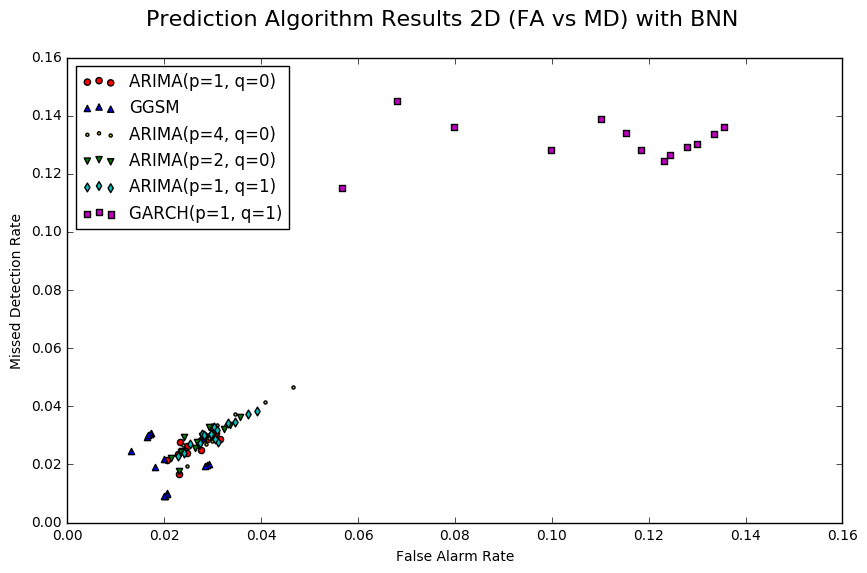

In [2]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 2D (FA vs MD) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

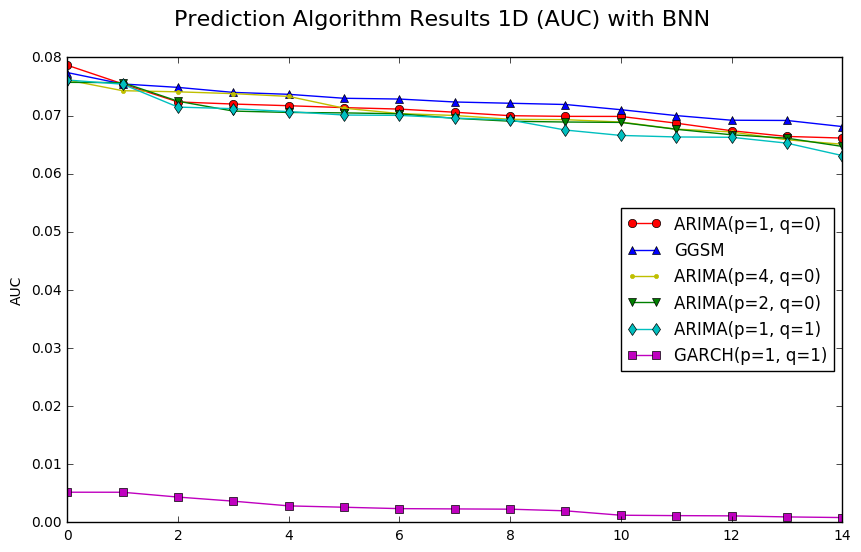

In [10]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 1D (AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='center right')

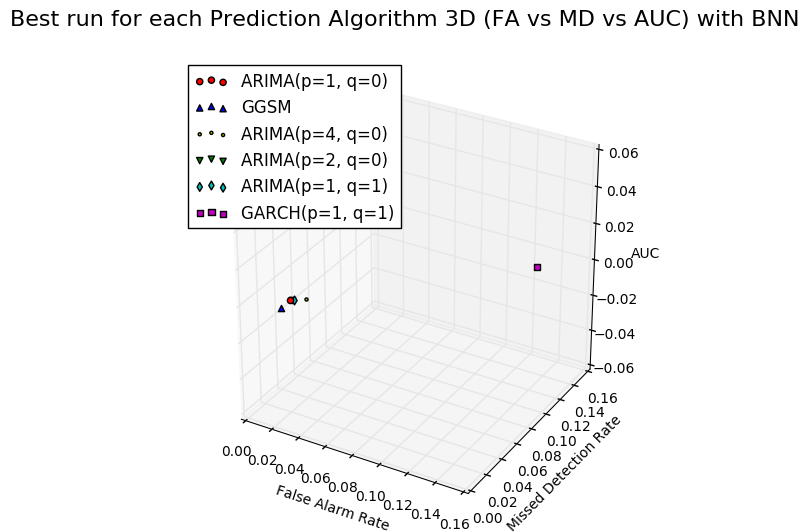

In [4]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 3D (FA vs MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    z = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

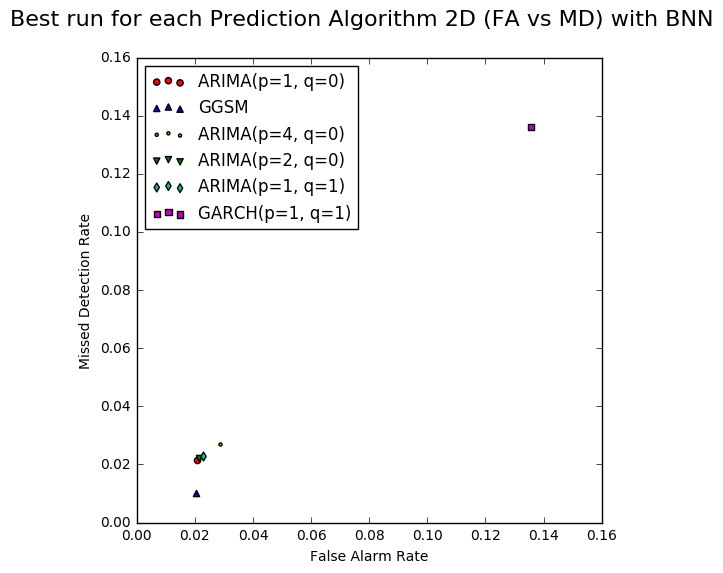

In [5]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 2D (FA vs MD) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

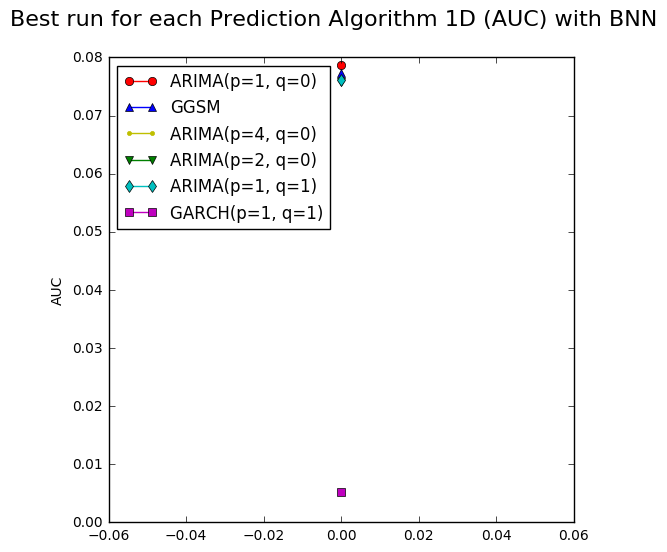

In [6]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 1D (AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

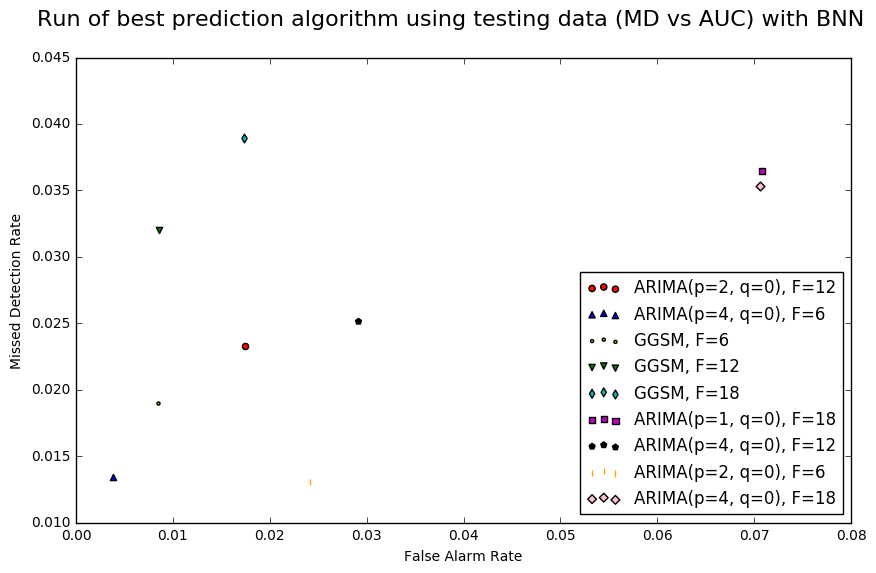

In [22]:
r = [
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.00383141762452, MD=0.0134099616858',
 'Model=GGSM, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.575, FA=0.0084388185654, MD=0.0189873417722',
 'Model=ARIMA(p=2, q=0), Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.325, FA=0.0241635687732, MD=0.0130111524164',
 'Model=GGSM, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.275, FA=0.00854700854701, MD=0.0320512820513',
 'Model=ARIMA(p=2, q=0), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0174418604651, MD=0.0232558139535',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.325, FA=0.0290697674419, MD=0.0251937984496',
 'Model=GGSM, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=2.875, FA=0.017316017316, MD=0.038961038961',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.175, FA=0.0705882352941, MD=0.0352941176471',
 'Model=ARIMA(p=1, q=0), Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.325, FA=0.0708502024291, MD=0.0364372469636'
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 6:
        algorithm = toks[0].replace('Model=', '')+ ', F=' + toks[2].split('=')[1]
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1] + ', F=' + toks[3].split('=')[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 6:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[4:]))
    else:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[5:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Run of best prediction algorithm using testing data (MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p'), ('#FFA500', '|'), ('#FFC0CB', 'D')]
count = 0
for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    y = [r[1] for r in algorithm_result]
    
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='lower right')